# Disease Prediction using Machine Learning

## Import libraries

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

## Load Data

In [4]:
DATA_PATH = "..//dataset//Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

## Checking dataset is balanced or not

In [5]:
disease_count = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_count.index,
    "Counts": disease_count.values
})

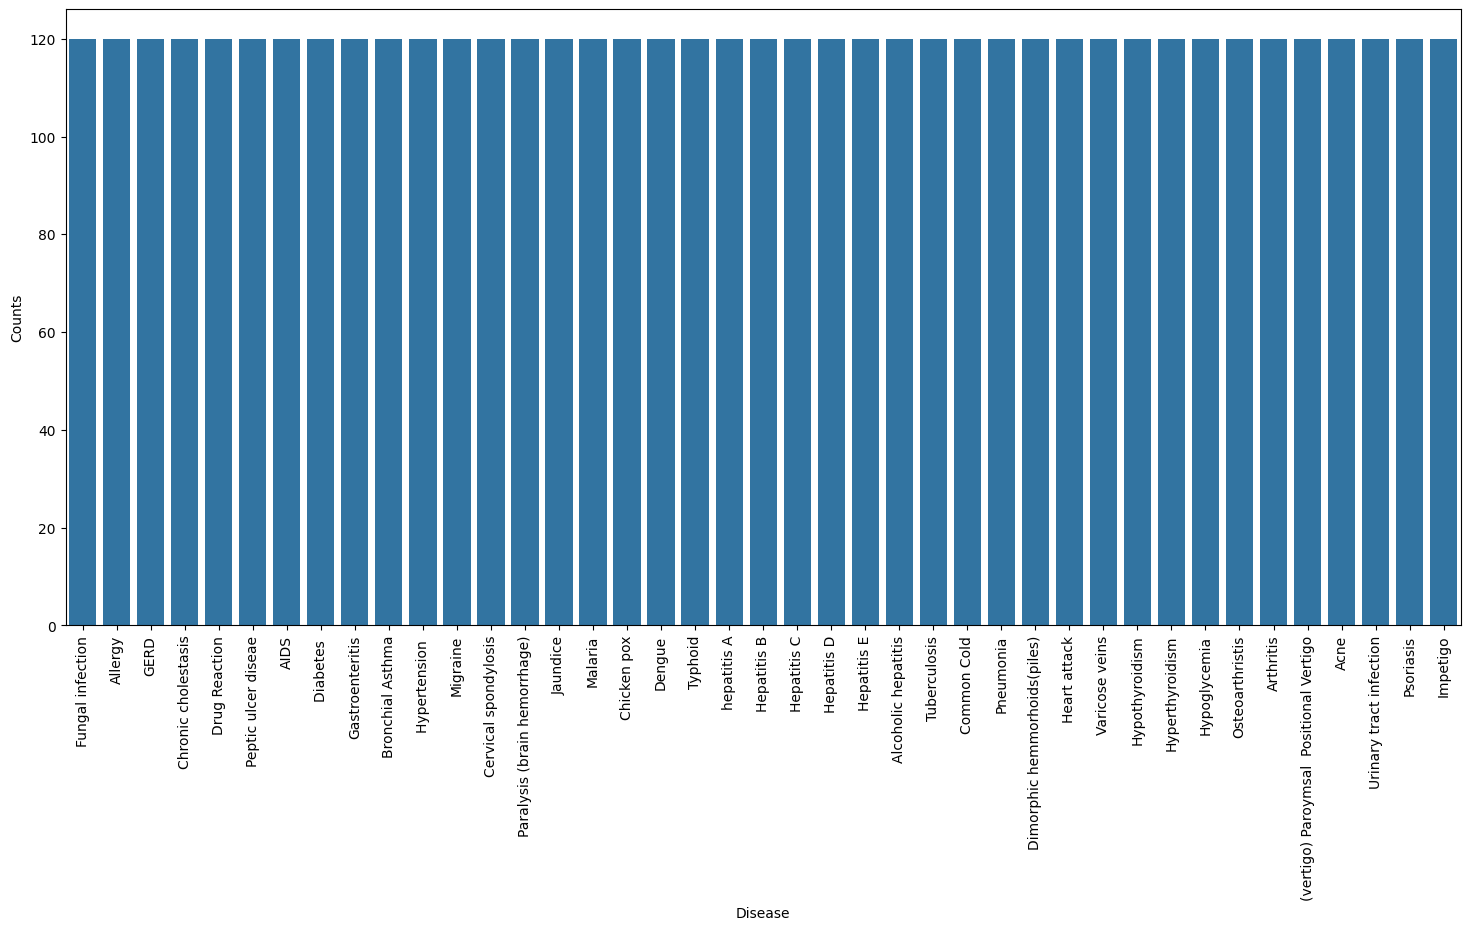

In [6]:
plt.figure(figsize=(18,8))
sns.barplot(x="Disease", y="Counts", data=temp_df)
plt.xticks(rotation=90)
plt.show()

## Encoding target column

In [7]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

## Splitting data for training and testing

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [11]:
print(f"Training : {X_train.shape}, {y_train.shape}")
print(f"Testing : {X_test.shape}, {y_test.shape}")

Training : (3936, 132), (3936,)
Testing : (984, 132), (984,)


## Model Training

In [15]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

In [16]:
# Initializing classifiers
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

In [17]:
#producing cross validation scores for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10,
                             n_jobs=-1,
                             scoring=cv_scoring)
    print("=="*30)
    print(f"Model : {model_name}")
    print(f"Scores : {scores}")
    print(f"Mean Score : {np.mean(scores)}")

Model : SVC
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0
Model : Gaussian NB
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0
Model : Random Forest
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0


## Testing all models

In [21]:
# Training and testing SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on training data by SVM : {accuracy_score(y_train,svm_model.predict(X_train))*100:.2f}%")
print(f"Accuracy on testing data by SVM : {accuracy_score(y_test,preds)*100:.2f}%")

Accuracy on training data by SVM : 100.00%
Accuracy on testing data by SVM : 100.00%


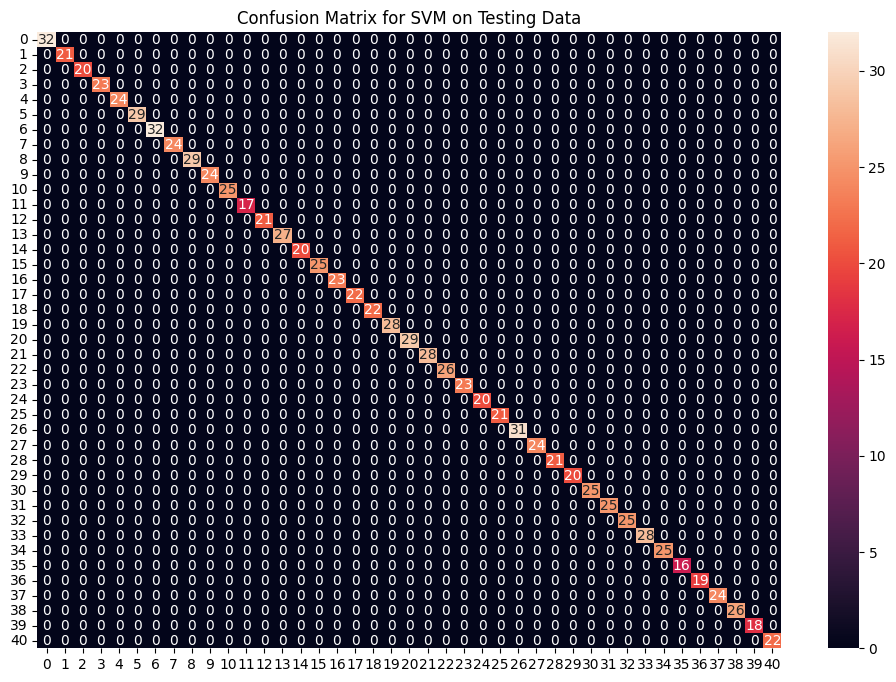

In [22]:
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM on Testing Data")
plt.show()

In [23]:
# Training and testing Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

print(f"Accuracy on training data by Naive Bayes : {accuracy_score(y_train,nb_model.predict(X_train))*100:.2f}%")
print(f"Accuracy on testing data by Naive Bayes : {accuracy_score(y_test,preds)*100:.2f}%")

Accuracy on training data by Naive Bayes : 100.00%
Accuracy on testing data by Naive Bayes : 100.00%


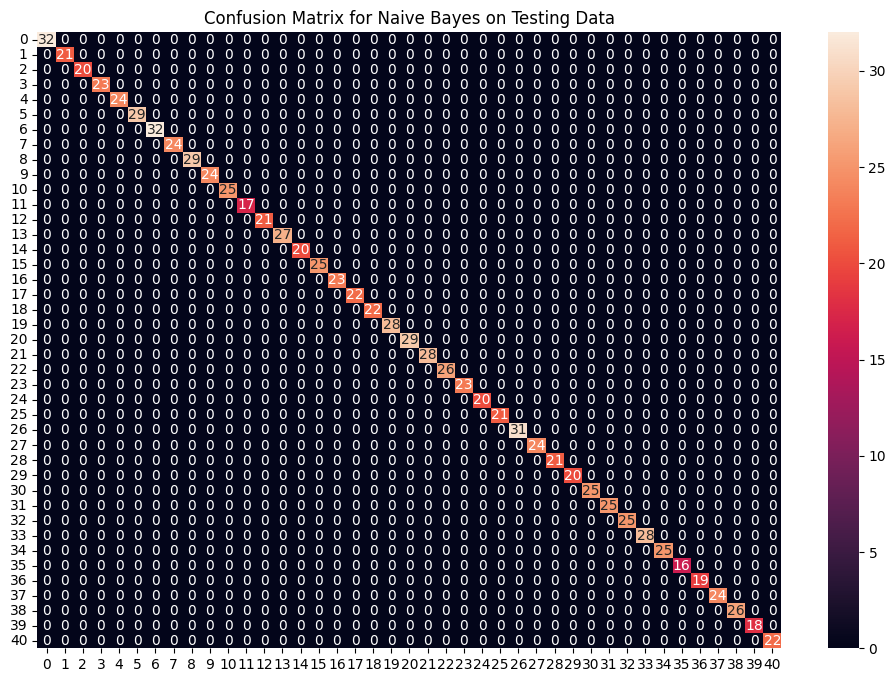

In [24]:
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes on Testing Data")
plt.show()

In [25]:
# Training and testing Random Frest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on training data by Random Frest : {accuracy_score(y_train,rf_model.predict(X_train))*100:.2f}%")
print(f"Accuracy on testing data by Random Frest : {accuracy_score(y_test,preds)*100:.2f}%")

Accuracy on training data by Random Frest : 100.00%
Accuracy on testing data by Random Frest : 100.00%


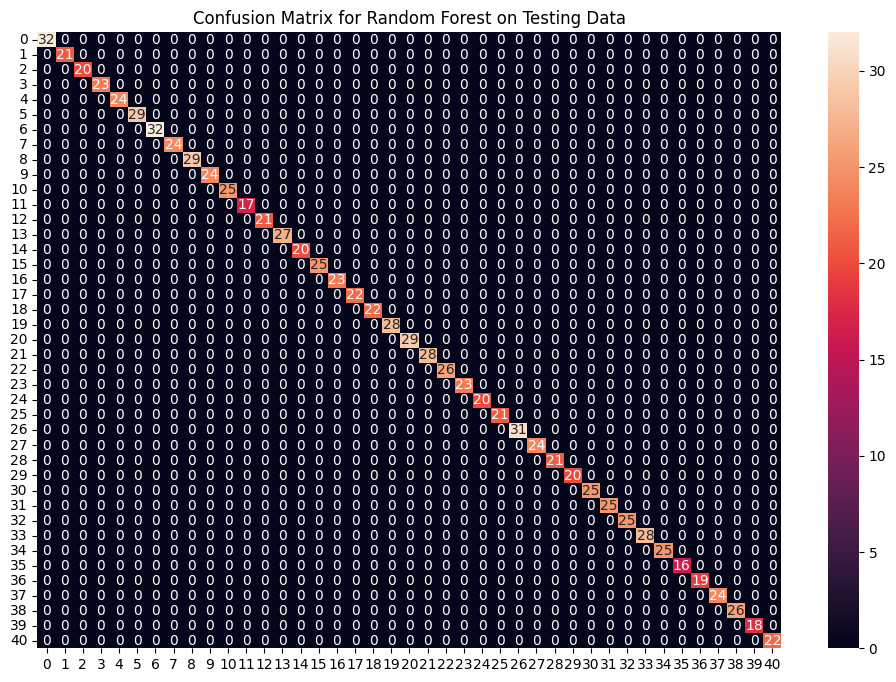

In [26]:
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest on Testing Data")
plt.show()

## Training Model on whole Data

In [27]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

In [28]:
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [29]:
# Reading the testing data
TEST_DATA_PATH = "..//dataset//Testing.csv"
test_data = pd.read_csv(TEST_DATA_PATH).dropna(axis=1)

In [31]:
test_X = test_data.iloc[:,:-1]
test_y = encoder.transform(test_data.iloc[:,-1])

In [32]:
# making prediction by take mode of predictions from all the models
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

In [35]:
final_preds = [mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]
print(f"Accuracy on testing data by final model : {accuracy_score(test_y,final_preds)*100:.2f}%")

Accuracy on testing data by final model : 100.00%


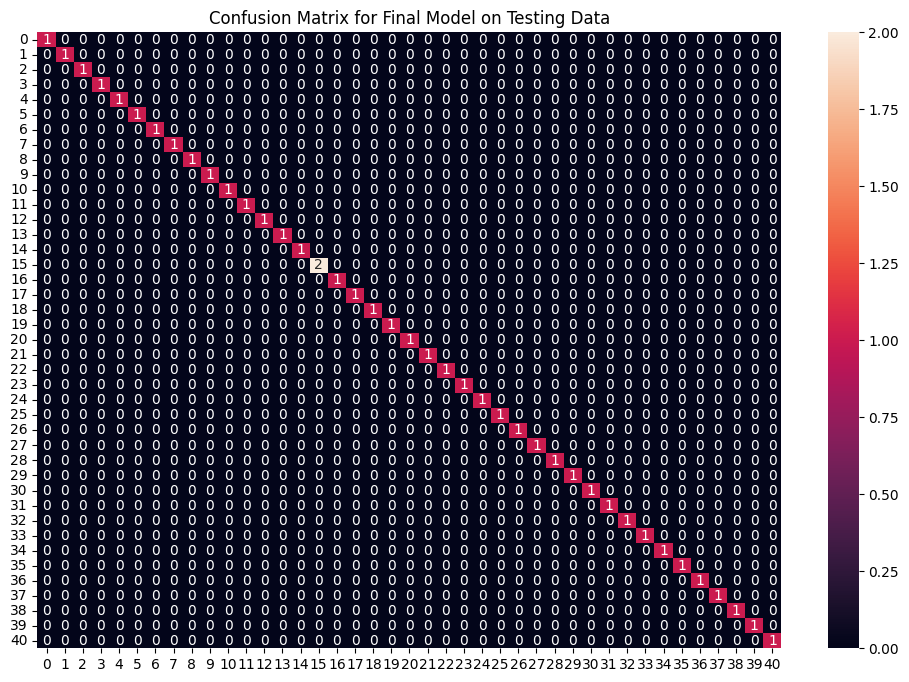

In [37]:
cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Final Model on Testing Data")   
plt.show()

In [38]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


d:\Machine_Learning_GFG\Disease_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Machine_Learning_GFG\Disease_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\Machine_Learning_GFG\Disease_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
